In [2]:
import tensorflow as tf
 

In [4]:
import numpy as np
import logging
logger = tf.get_logger()
logger.setLevel(logging.ERROR)

Setup Training Data


In [8]:
celsius_q = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99], dtype = float)
fahrenheit_a = np.array([32, 33.8, 35.6, 37.4, 39.2, 41, 42.8, 44.6, 46.4, 48.2, 50, 51.8, 53.6, 55.4, 57.2, 59, 60.8, 62.6, 64.4, 66.2, 68, 69.8, 71.6, 73.4, 75.2, 77, 78.8, 80.6, 82.4, 84.2, 86, 87.8, 89.6, 91.4, 93.2, 95, 96.8, 98.6, 100.4, 102.2, 104, 105.8, 107.6, 109.4, 111.2, 113, 114.8, 116.6, 118.4, 120.2, 122, 123.8, 125.6, 127.4, 129.2, 131, 132.8, 134.6, 136.4, 138.2, 140, 141.8, 143.6, 145.4, 147.2, 149, 150.8, 152.6, 154.4, 156.2, 158, 159.8, 161.6, 163.4, 165.2, 167, 168.8, 170.6, 172.4, 174.2, 176, 177.8, 179.6, 181.4, 183.2, 185, 186.8, 188.6, 190.4, 192.2, 194, 195.8, 197.6, 199.4, 201.2, 203, 204.8, 206.6, 208.4, 210.2], dtype = float)

for i,c in enumerate(celsius_q):
  print("{} degrees Celsius = {} degrees Fahrenheit".format(c, fahrenheit_a[i]))

0.0 degrees Celsius = 32.0 degrees Fahrenheit
1.0 degrees Celsius = 33.8 degrees Fahrenheit
2.0 degrees Celsius = 35.6 degrees Fahrenheit
3.0 degrees Celsius = 37.4 degrees Fahrenheit
4.0 degrees Celsius = 39.2 degrees Fahrenheit
5.0 degrees Celsius = 41.0 degrees Fahrenheit
6.0 degrees Celsius = 42.8 degrees Fahrenheit
7.0 degrees Celsius = 44.6 degrees Fahrenheit
8.0 degrees Celsius = 46.4 degrees Fahrenheit
9.0 degrees Celsius = 48.2 degrees Fahrenheit
10.0 degrees Celsius = 50.0 degrees Fahrenheit
11.0 degrees Celsius = 51.8 degrees Fahrenheit
12.0 degrees Celsius = 53.6 degrees Fahrenheit
13.0 degrees Celsius = 55.4 degrees Fahrenheit
14.0 degrees Celsius = 57.2 degrees Fahrenheit
15.0 degrees Celsius = 59.0 degrees Fahrenheit
16.0 degrees Celsius = 60.8 degrees Fahrenheit
17.0 degrees Celsius = 62.6 degrees Fahrenheit
18.0 degrees Celsius = 64.4 degrees Fahrenheit
19.0 degrees Celsius = 66.2 degrees Fahrenheit
20.0 degrees Celsius = 68.0 degrees Fahrenheit
21.0 degrees Celsius = 

Create the model

Build the layer



In [10]:
l0 = tf.keras.layers.Dense(units = 1, input_shape = [1])

Assemble the layers into models



In [11]:
model = tf.keras.Sequential([l0])

Compiling the model

Loss function — A way of measuring how far off predictions are from the desired outcome

Optimizer function — A way of adjusting internal values in order to reduce the loss.


In [13]:
model.compile(loss='mean_squared_error',
              optimizer=tf.keras.optimizers.Adam(0.1))

**Train the model**

Train the model by calling the fit method.
During training, the model takes in Celsius values, performs a calculation using the current internal variables (called "weights")

The difference between the actual output and the desired output is calculated using the loss function
optimizer function directs how the weights should be adjusted.

This cycle of calculate, compare, adjust is controlled by the fit method.

The epochs argument specifies how many times this cycle should be run,
the verbose argument controls how much output the method produces.

In [14]:
history = model.fit(celsius_q, fahrenheit_a, epochs=500, verbose=False)
print("Finished training the model")

Finished training the model


**Display The training Statistics**

The fit method returns a history object.

We can use this object to plot how the loss of our model goes down after each training epoch.

A high loss means that the Fahrenheit degrees the model predicts is far from the corresponding value in fahrenheit_a.

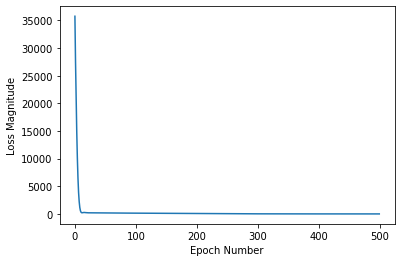

In [15]:
import matplotlib.pyplot as plt
plt.xlabel('Epoch Number')
plt.ylabel("Loss Magnitude")
plt.plot(history.history['loss'])

**Use The Model To Predict The Values.**

In [16]:
print(model.predict([100.00]))

[[212.67905]]


In [ ]:
print(model.predict([125.00]))

[[258.15924]]


**Looking At The layer weigths**


In [18]:
print("These are the layer variables: {}".format(l0.get_weights()))

These are the layer variables: [array([[1.8192072]], dtype=float32), array([30.758339], dtype=float32)]


# **The first variable is close to ~1.8 and the second to ~32. These values (1.8 and 32) are the actual variables in the real conversion formula.**

**A little experiment**

Just for fun, what if i created more Dense layers with different units, which therefore also has more variables?

In [30]:
l0 = tf.keras.layers.Dense(units=4, input_shape=[1])
l1 = tf.keras.layers.Dense(units=4)
l2 = tf.keras.layers.Dense(units=1)
model = tf.keras.Sequential([l0, l1, l2])
model.compile(loss='mean_squared_error', optimizer=tf.keras.optimizers.Adam(0.1))
model.fit(celsius_q, fahrenheit_a, epochs=500, verbose=False)
print("Finished training the model")
print(model.predict([100.00]))
print(model.predict([125.00]))
print("Model predicts that 100 degrees Celsius is: {} degrees Fahrenheit".format(model.predict([100.00])))
print("Model predicts that 125 degrees Celsius is: {} degrees Fahrenheit".format(model.predict([125.00])))
print("These are the l0 variables: {}".format(l0.get_weights()))
print("These are the l1 variables: {}".format(l1.get_weights()))
print("These are the l2 variables: {}".format(l2.get_weights()))

Finished training the model
[[213.97246]]
[[259.44998]]
Model predicts that 100 degrees Celsius is: [[213.97246]] degrees Fahrenheit
Model predicts that 125 degrees Celsius is: [[259.44998]] degrees Fahrenheit
These are the l0 variables: [array([[ 0.49207115, -0.04482879,  0.6998499 , -0.3372444 ]],
      dtype=float32), array([ 5.1723776,  1.4523617,  4.214589 , -4.9613576], dtype=float32)]
These are the l1 variables: [array([[-0.8500079 , -0.12417729, -0.43513677,  0.82973254],
       [-0.91534257,  0.56252676,  0.0964595 , -0.49240997],
       [-0.5180328 , -0.399587  ,  1.0542041 , -0.39910814],
       [ 0.34242097,  0.88315433,  0.45066458,  0.42489153]],
      dtype=float32), array([-4.4136767, -4.1182656,  2.6692178,  1.1236953], dtype=float32)]
These are the l2 variables: [array([[-1.1022352 ],
       [-1.1085539 ],
       [ 0.3800897 ],
       [ 0.11713625]], dtype=float32), array([4.3533754], dtype=float32)]
